In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
heart=pd.read_csv("/content/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x=heart.iloc[:,0:8]
y=heart.iloc[:,8:9]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
heart=sc.fit(x)
d=sc.transform(x)
print(heart)
print(d)
print(x)

StandardScaler()
[[ 0.9521966   0.68100522  1.97312292 ...  2.394438   -1.00583187
   0.01544279]
 [-1.91531289  0.68100522  1.00257707 ... -0.41763453  0.89896224
   1.63347147]
 [-1.47415758 -1.46841752  0.03203122 ... -0.41763453 -1.00583187
   0.97751389]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  2.394438    0.89896224
  -0.37813176]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.41763453  0.89896224
  -1.51512489]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.41763453 -1.00583187
   1.0649749 ]]
     age  sex  cp  trestbps  chol  fbs  restecg  thalach
0     63    1   3       145   233    1        0      150
1     37    1   2       130   250    0        1      187
2     41    0   1       130   204    0        0      172
3     56    1   1       120   236    0        1      178
4     57    0   0       120   354    0        1      163
..   ...  ...  ..       ...   ...  ...      ...      ...
298   57    0   0       140   241    0        1      123
299   45    1   3       110   264  

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75, 8)
(75, 1)
(228, 8)
(228, 1)


In [12]:
from sklearn.metrics import accuracy_score
lg=LogisticRegression(random_state=99)
m=lg.fit(x_train,y_train)
print(m.score(x_train,y_train))
print(m.score(x_test,y_test))
ypre=m.predict(x_test)
print(accuracy_score(ypre,y_test))

0.84
0.7719298245614035
0.7719298245614035


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(ypre,y_test))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       180
           1       0.47      0.77      0.59        48

    accuracy                           0.77       228
   macro avg       0.70      0.77      0.71       228
weighted avg       0.83      0.77      0.79       228



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


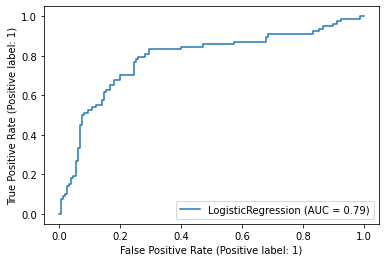

In [14]:
from sklearn import metrics
metrics.plot_roc_curve(m,x_test,y_test)

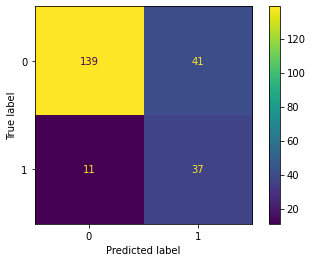

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c=confusion_matrix(ypre,y_test)
d=ConfusionMatrixDisplay(c).plot()